# seaborn - 빈도 그래프 2

    - 데이터의 빈도를 표현하는 다른 방법들
    - 'statmodels' 패키지의 설치가 필요하다.

### 01. 작업준비
#### 1. 패키지 참조

In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

#### 2. 데이터 가져오기

In [2]:
titanic = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/titanic.xlsx")
df = titanic.astype({'Survived' : 'category', 'Pclass' : 'category', 'Sex' : 'category',
                     'Cabin' : "category", 'Embarked' : "category"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. 그래프 전역 설정

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 02. Countplot

    - 데이터 빈도를 표현하는 가장 간편한 방법

    - 'catplot()' 에서 kind 값이 count로 고정되어 있는 형태

#### 1. X 축에 설정된 집단별 빈도수 확인

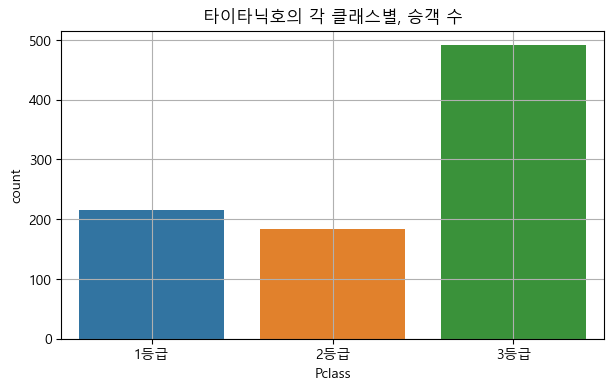

In [5]:
sb.countplot(data = df, x ='Pclass')
plt.title('타이타닉호의 각 클래스별, 승객 수')
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

#### 2. 범주 추가

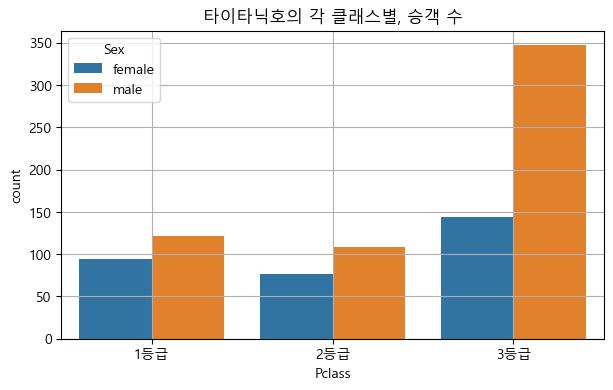

In [6]:
sb.countplot(data = df, x = 'Pclass', hue = 'Sex')
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

### 03. 모자이크 그래프

    - 막대 그래프 외에도 변량이 모두 범주형인 다자원 데이터를 시각화할 때 모자이크 그래프(mosaic plot)을 사용하기도 한다.

    - 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프이다.

    - 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있다.
    
    - 모자이크 그래프는 'statsmodels.graphics.mosaicplot' 패키지의 'mosaic' 함수를 이용해서 그린다.

    #### 1. 한가지 변수에 대한 비율 표시

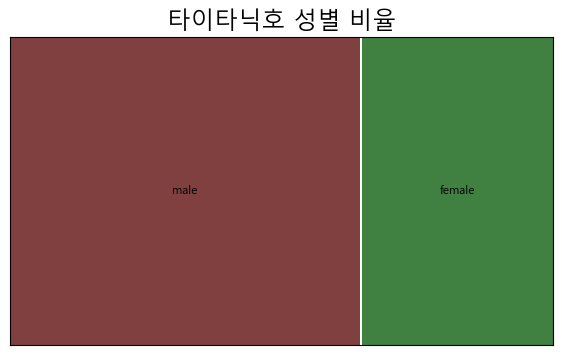

In [7]:
mosaic(df, ['Sex'], axes_label = False)

plt.title('타이타닉호 성별 비율', fontsize=17)
plt.show()
plt.close()

#### 2. 두 개 이상 범주에 대한 비유 표시

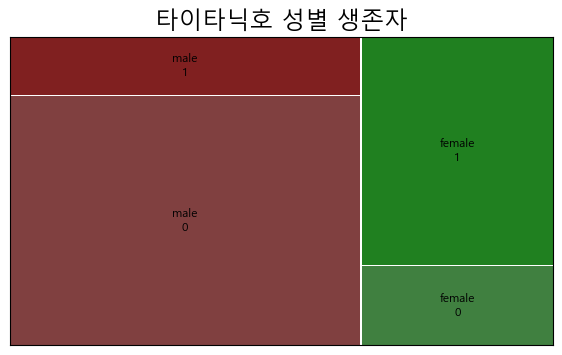

In [8]:
mosaic(df, ['Sex', 'Survived'], axes_label = False)
plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

#### 3. 색상과 표시 라벨 변경하기

In [14]:
def getColor(key):
    print(key)
    if '1' in key:
        color = 'teal'
    else:
        color = 'lightgray'
    return {'color' : color}

In [15]:
def getLabel(key):
    if 'male' in key:
        sex = '남자'
    else:
        sex = '여자'
    
    if '0' in key:
        sur = '사망'
    else:
        sur = '생존'
    
    label = '%s/%s' % (sex, sur)
    print(key, "->", label)
    return label

('male', '0')
('male', '0') -> 남자/사망
('male', '1')
('male', '1') -> 남자/생존
('female', '0')
('female', '0') -> 여자/사망
('female', '1')
('female', '1') -> 여자/생존


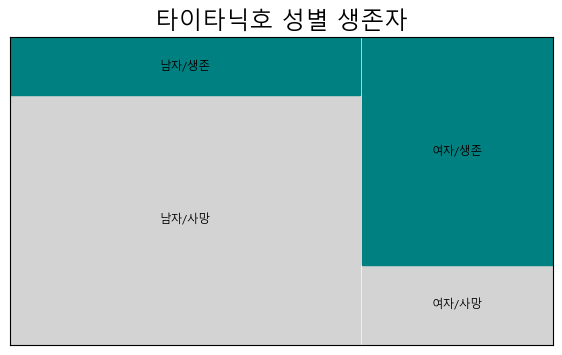

In [16]:
mosaic(df, ['Sex', 'Survived'], axes_label = False,
       properties = getColor, labelizer = getLabel)

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

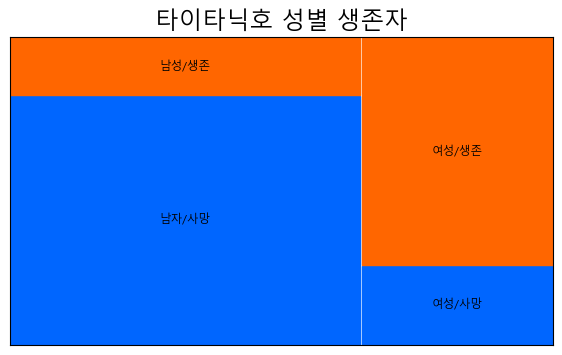

In [17]:
# Lambda 식 사용
# lambda 파라미터이름 : 리턴값

mosaic(df, ['Sex', 'Survived'], axes_label=False,
       properties = lambda key : {'color' : '#ff6600' if '1' in key else '#0066ff'},
       labelizer = lambda key : {('female', '1') : '여성/생존', ('female', '0') : '여성/사망', ('male', '1') : '남성/생존',
                                 ('male', '0') : '남자/사망'}[key])

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

### 04. 집단별 산점도 그래프

In [18]:
plt.rcParams["font.size"] = 16               
plt.rcParams["figure.figsize"] = (20, 10)   

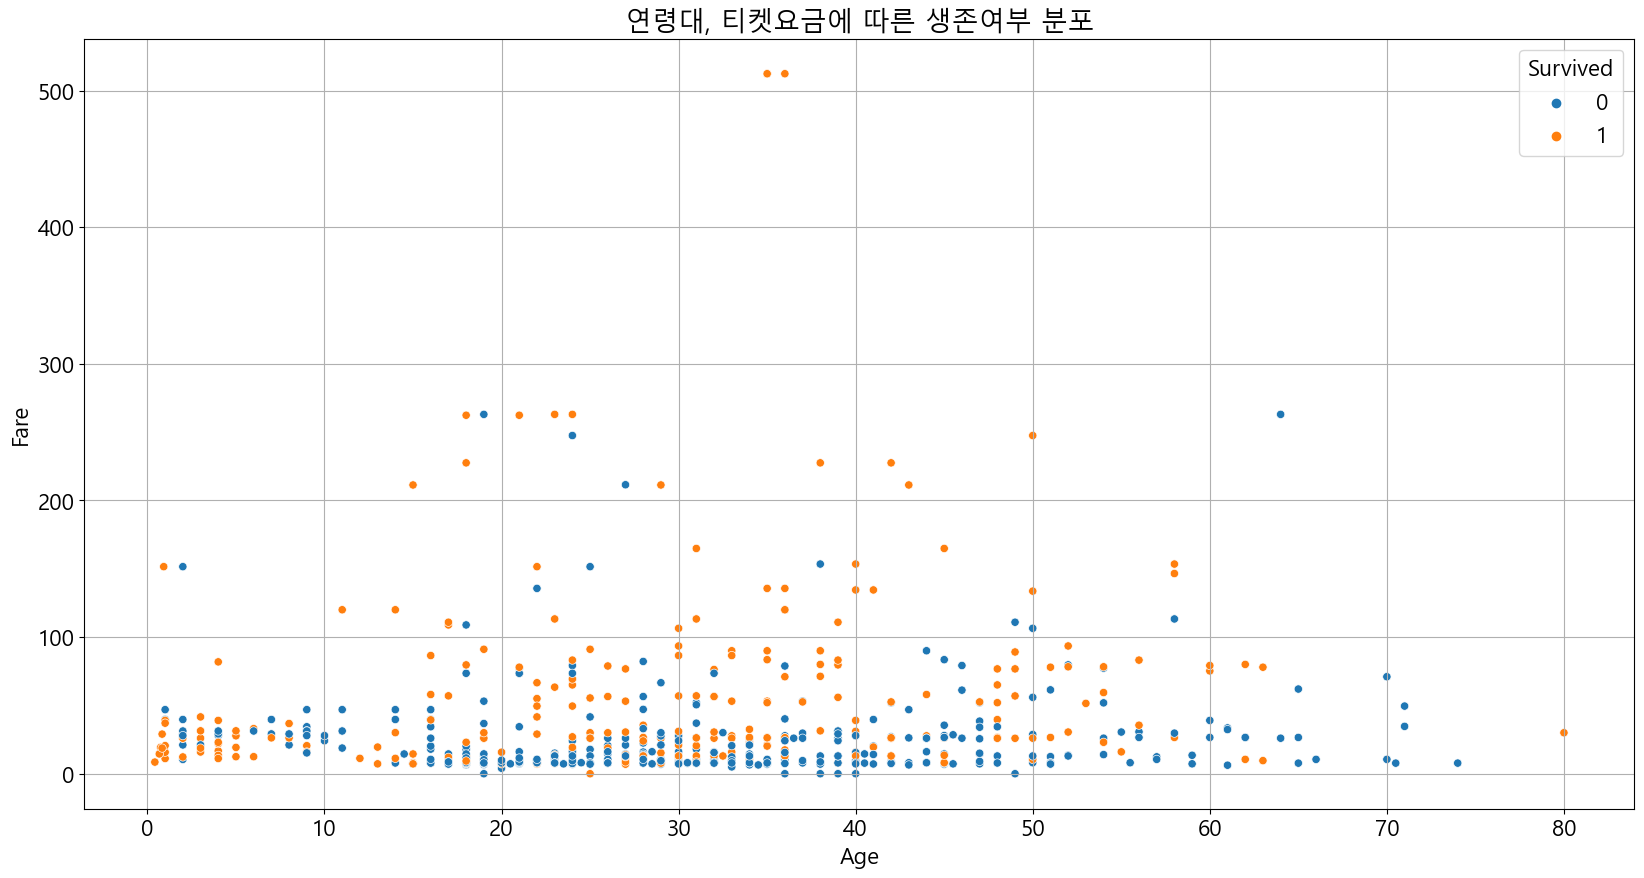

In [20]:
sb.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived')
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()

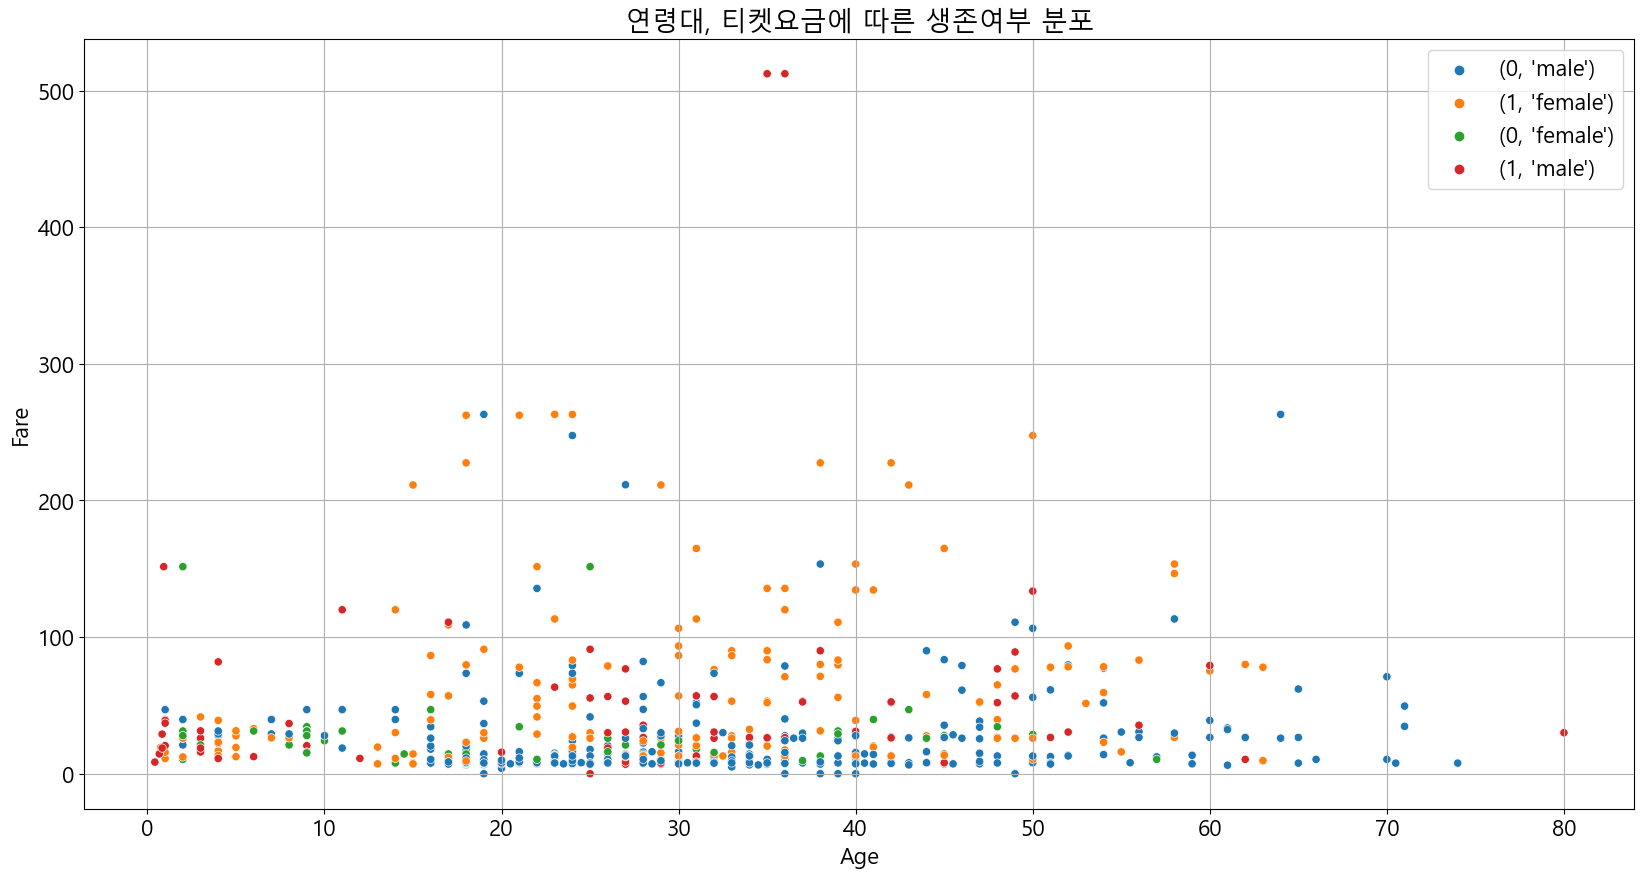

In [21]:
sb.scatterplot(data = df, x = 'Age', y = 'Fare', hue = df[['Survived', 'Sex']].apply(tuple, axis = 1))

plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()

### 05. 산점도 행렬

    - 각 변수를 교차로 산점도 그래프를 나열한 형태
    
    - 범주형 데이터는 자도응로 제외된다.

    - 왼쪽 상당에서 오른쪽 하단으로의 중앙에는 각 데이터의 히스토그램이 표시된다.

    - 'diag_kind = 'kde'' 파라미터를 추가하면 히스토그램 대신 커널밀도 추정곡선을 표시한다.

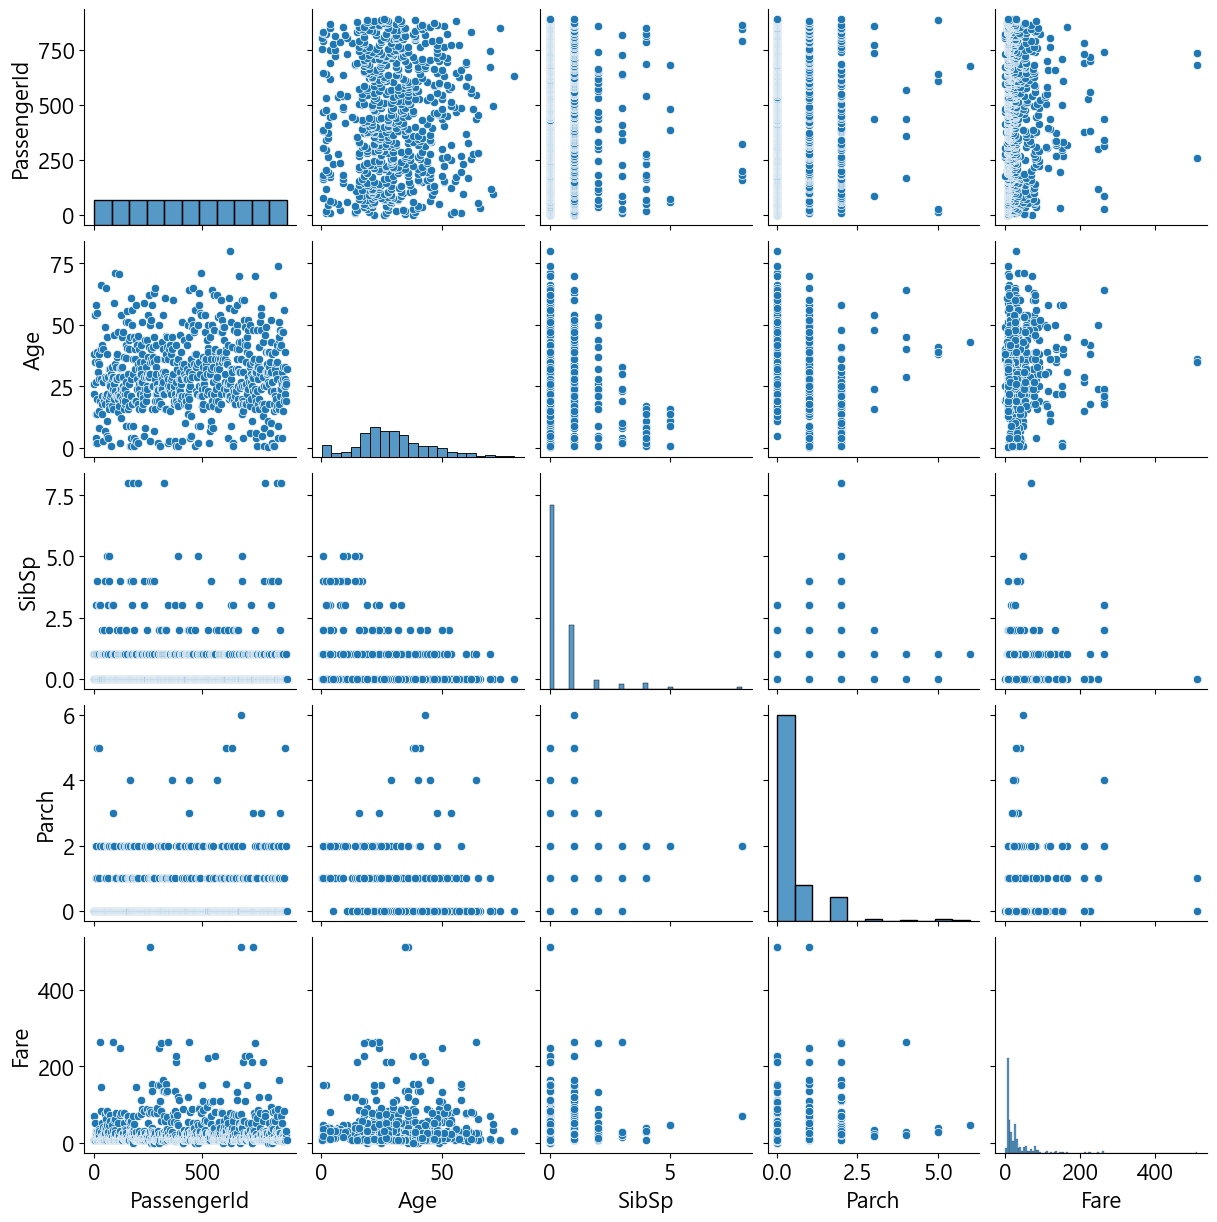

In [22]:
sb.pairplot(df)
plt.show()
plt.close()

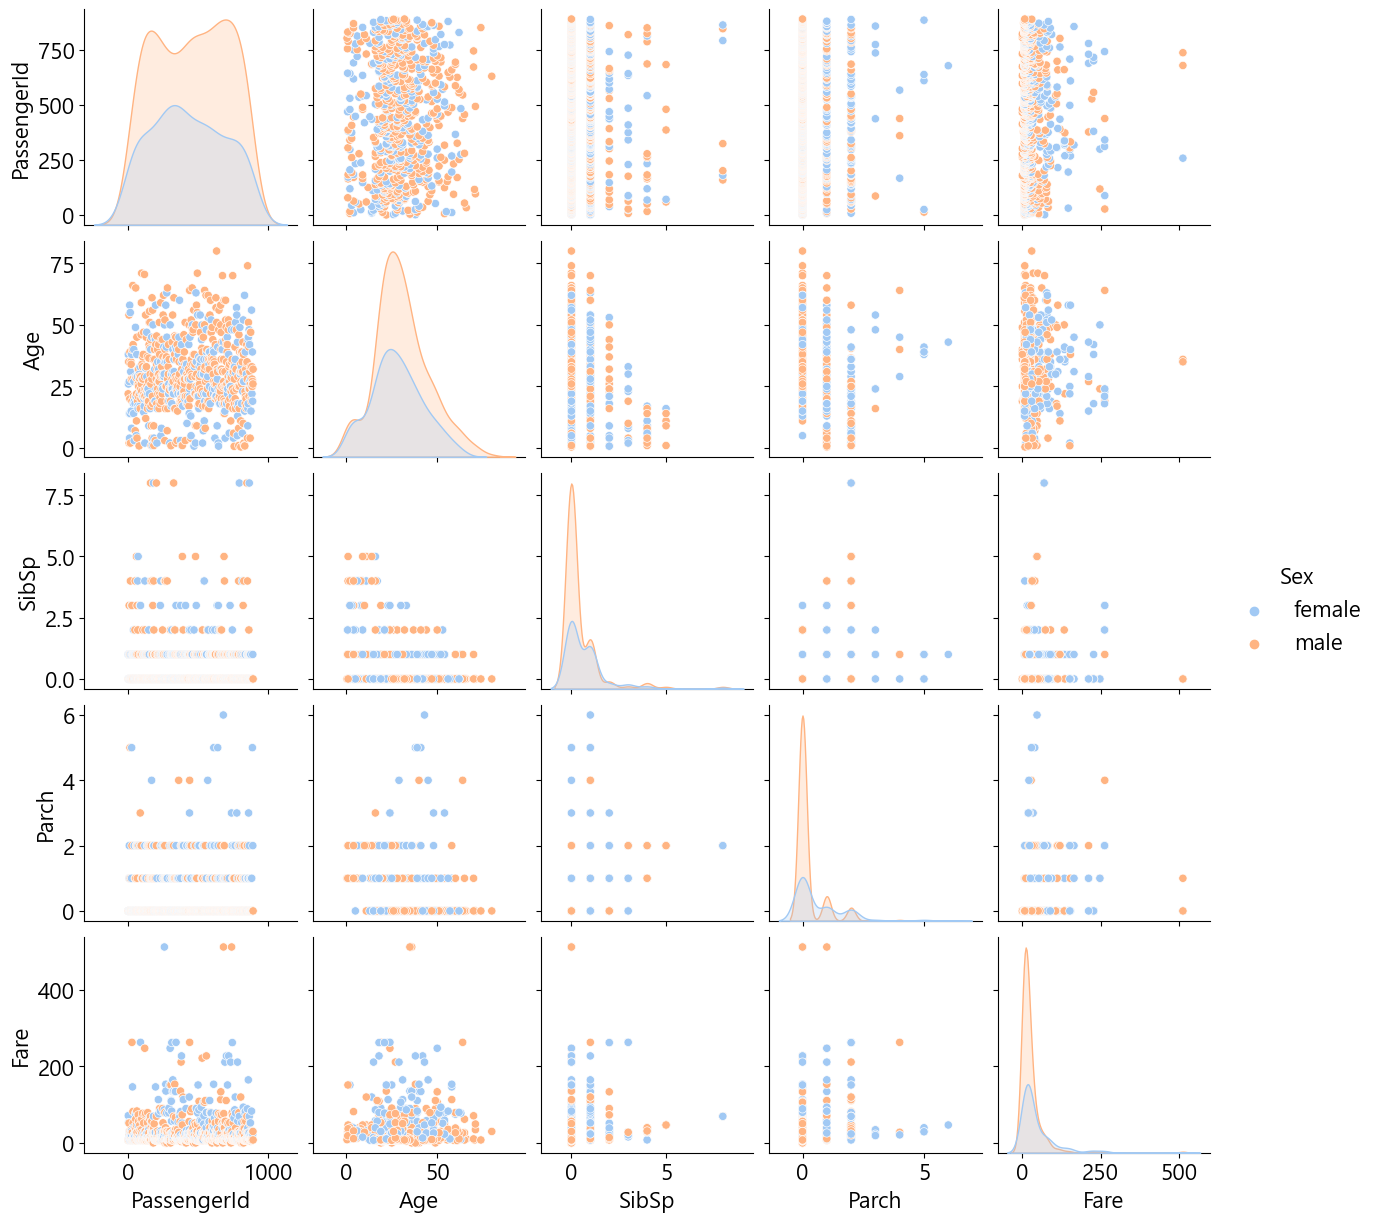

In [23]:
# 팔레트를 이용한 산점도 행렬
# 범주를 성별로 넣을 때
sb.pairplot(df, hue = 'Sex', palette = 'pastel')
plt.show()
plt.close()